

# Project: The Movie Database (TMDb), this is the dataset that I have decided to investigate )
I would like to know if the budget affect also the amount of revenues. In other words is there a correlation between the budget and the revenues per film.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 <li> 
<ul> Does the popularity of a movie affect the revenue? Is a higher budget associated with higher popularity?</ul>
    <ul> Is the number of movies released per year increased or decreased? </ul>
    <ul>What is the correlation between the different variables in our dataset? </ul>
    <ul>Do the average revenue increase or decrease during the years? </ul>
    <ul>How is the distribution of avergae vote for our movies? </ul></li>
    
    



In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 



<a id='wrangling'></a>
## Data Wrangling




In [31]:
# Loading the data from the Movie Database
df = pd.read_csv('movies.csv')
# Checking the data for the first 5 rows
df.head()



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09




<h1> <b> Data Cleaning </b> </h1>
<h3> I will check for the data that I want to analyse if there are nan values, if there are columns that i dont want to use and I will drop those values and columns </h3>


In [32]:
# Get informations about the columns, data type and missing values
df.info()
df.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

(10866, 21)

In [33]:
# Getting an idea about some statistics info for the numerical data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<h2> I will drop some of the columns that I am not going to use </h2>

In [34]:
df.drop(['budget', 'revenue', 'homepage','keywords','tagline','production_companies','release_date'], axis = 1, inplace = True)

<p> I have deleted the budget,revenue  and columns because I will use the adjusted value (in case that I actually use them)Also I will not need release date but only the year of release. The columns homepage, tagline, production coompanies and keywords are not needed for tha analysis that I want to perform </p>

In [35]:
# Checking for missing values and data type, the variables that I will not use will be dropped. So I dont need to change the data type to any of this variables
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
id                10866 non-null int64
imdb_id           10856 non-null object
popularity        10866 non-null float64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
overview          10862 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.2+ MB


In [36]:
df.isnull().sum()

id                 0
imdb_id           10
popularity         0
original_title     0
cast              76
director          44
overview           4
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ebcfa90>,
      dtype=object)

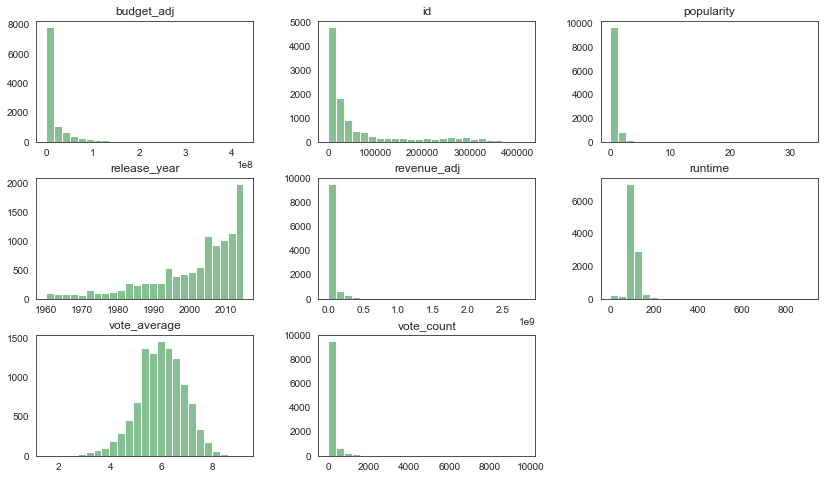

In [37]:
df.hist( bins=25, grid=False, figsize=(14,8), color='#86bf91')

In [38]:
# view missing value count for each column
df.isnull().sum()

id                 0
imdb_id           10
popularity         0
original_title     0
cast              76
director          44
overview           4
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

<h2> Now that our data is clean we can continue with the investigation of the dataset </h2>


<a id='eda'></a>
## Exploratory Data Analysis

> Now that I have cleaned my data I will try to find answer to the questions that I have
### Does the popularity of a movie affect the revenue? Is a higher budget associated with a higher popularity?

I want to see if the popularity increase the revenue for a movie
I have separeted the data based on the popularity . The one with a popularity over the average are consider popular and the other are considered non popular

In [39]:
popular  = df['popularity'] > df['popularity'].mean()
nonpopular = df['popularity'] < df['popularity'].mean()

In [40]:
#Here I find the mean for the movies that I consider popular
df.revenue_adj[popular].mean()

151425933.8043379

In [41]:
# Here I find the mean for the unpopular movies
df.revenue_adj[nonpopular].mean()

12121766.525912443

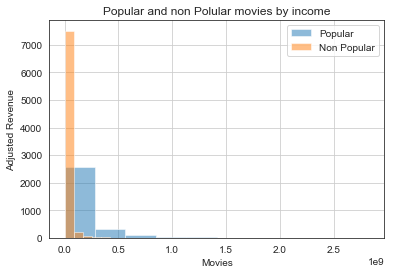

In [42]:
df.revenue_adj[popular].hist(alpha = 0.5, label ='Popular')
df.revenue_adj[nonpopular].hist(alpha = 0.5, label ='Non Popular')
plt.ylabel('Adjusted Revenue')
plt.xlabel('Movies')
plt.title('Popular and non Polular movies by income')
plt.legend()


<h2> We can clearly see that the average revenue for popular movies is higher than the non popular movies </h2>

<h2> Now we will check the relation between adjusted budget and popularity</h2>

In [43]:
df.budget_adj[nonpopular].mean()

7343511.941448852

In [44]:
df.budget_adj[popular].mean()

43578401.833544455

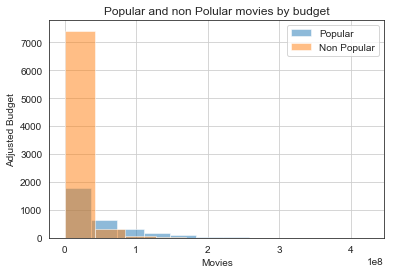

In [45]:
df.budget_adj[popular].hist(bins = 10, alpha = 0.5, label ='Popular')
df.budget_adj[nonpopular].hist(bins = 10,alpha = 0.5, label ='Non Popular')
plt.ylabel('Adjusted Budget')
plt.xlabel('Movies')
plt.title('Popular and non Polular movies by budget')
plt.legend()
plt.legend()

<h2> We can clearly see in this case as well that there is a distrinction between the popular and non popular movies related to budget. The adjusted budget of the popular movies is bigger than the non popular </h2>

### Is the number of movies released per year increased or decreased ? 


/Users/mario/Documents/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Movies by Year')

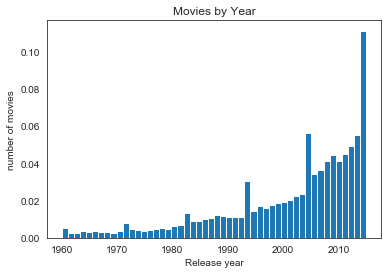

In [46]:
x = df['release_year']
plt.hist(x, normed=True, bins=50)
plt.ylabel('number of movies')
plt.xlabel('Release year')
plt.title('Movies by Year')

The above histogram shows that the number of movies released is increased year by year!

<h2> What is the correlation between the different variables in our dataset? </h2>

In [47]:
# I want to take a look at the correcletion betweeten the different variables
df.corr()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014350,-0.088360,-0.035551,-0.058363,0.511364,-0.189015,-0.138477
popularity,-0.014350,1.000000,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
runtime,-0.088360,0.139033,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676
vote_count,-0.035551,0.800828,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,-0.058363,0.209511,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.511364,0.089801,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,-0.189015,0.513550,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607
revenue_adj,-0.138477,0.609083,0.175676,0.707942,0.193085,-0.066256,0.646607,1.000000


<h4> I am trying to see if the different variables correlate with each other and how much. For example we can see that there is a positive correlation between Adjusted Revenue and vote count. Maybe the movies who have been voted the most are also more popular and as a result they bring more revenue. 

<h2> Do the average revenue increase or decrease during the years? </h2>

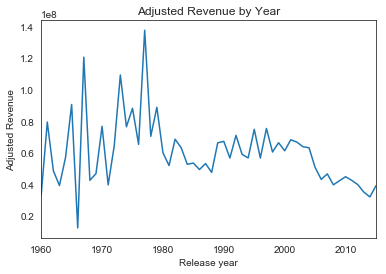

In [48]:
df.groupby('release_year')['revenue_adj'].mean().plot(x='release_year', y='revenue_adj',  legend=False)
plt.ylabel('Adjusted Revenue')
plt.xlabel('Release year')
plt.title('Adjusted Revenue by Year')
sns.set_style('darkgrid')


<h2> It looks like in the begining the average revenue was higher and in the last decade it has decreased.
    

<h3> How is the distribution of avergae vote for our movies? </h3>

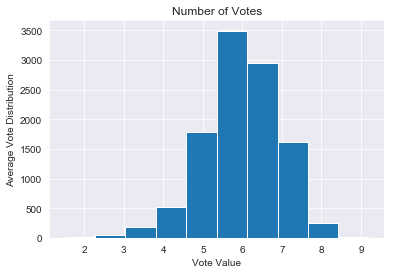

In [49]:
# Histogram showing how is the average vote distributed
df['vote_average'].hist()
plt.ylabel('Average Vote Distribution')
plt.xlabel('Vote Value')
plt.title('Number of Votes')
sns.set_style('white')

<h3> The above plot shows that the distribution is almost a normal distribution, that means that the mean=mode=median. Of course we would need an actually analysis for all this data to concluded something like that. I would say that the average vote appears normaly distribuited.

<h1> Conclusion </h1>

 <h4>
  After the cleaning and the analysis of our data, we can say that there is definitely a positive correlation between the budget that a movie use and its revenue. 
    
The popularity looks like has a positive impact on our revenues.
    On the other hand, during the last year, the average income has been decreased. There could be many reasons for that. 
    
We don't have enough data to conclude the reason for that. It is also important to notice that the number of movies released each year has been increased. That could be one reason that affects the average revenue per movie.
In the above analysis is necessary to add that 2 columns have a lot of zero values and also we have dropped the NaN values. As a result, we cant be 100% sure for our findings.

In the same time if we wanted to analyze only the budget and the revenue we would need to take in consideration the new technologies and how they impact the revenue stream, also the financial part of the analysis such as inflation.
    </h4>

    